---

# 🧠 초급 딥러닝 실습 미션: "MNIST 손글씨 숫자 인식기 직접 구현"

## 🎯 학습 목표
- 신경망의 기본 구조 이해 (입력층 - 은닉층 - 출력층)
- NumPy 기반 행렬 내적 연산 이해
- 활성화 함수 (ReLU, sigmoid, softmax) 구현 능력 배양
- 사전 학습된 가중치를 사용한 추론 (inference) 수행
- MNIST 손글씨 숫자 데이터셋의 이해 및 시각화

---

## 📂 사용 데이터셋
- MNIST 손글씨 숫자 이미지 👉 `tensorflow.keras.datasets.mnist` 또는 `.npz` 파일 형태 제공
- 사전 학습된 가중치 파일 (제공됨, `weights.npz`)

---

## 📌 과제 세부 항목

### 문제 1. 활성화 함수 구현
아래 활성화 함수를 직접 구현하세요 (NumPy 사용):

- sigmoid
- ReLU
- softmax

```python
def sigmoid(x):
    # 여기에 작성
    pass

def relu(x):
    # 여기에 작성
    pass

def softmax(x):
    # 여기에 작성
    pass
```

---

### 문제 2. 각 레이어별 순전파 연산 구현
다음은 입력값 `x`에 대해 각 레이어에서 수행할 순전파(forward propagation) 연산입니다.  
다층 퍼셉트론(MLP) 모델로, 총 3개의 레이어를 구성합니다.

```python
def forward(x, weights):
    W1, b1 = weights['W1'], weights['b1']
    W2, b2 = weights['W2'], weights['b2']
    W3, b3 = weights['W3'], weights['b3']
    
    z1 = np.dot(x, W1) + b1
    a1 = relu(z1)
    # 이하 직접 구현해야…
```

---

### 문제 3. 학습된 가중치 불러오기
제공된 `weights.npz` 파일에서 가중치를 불러와 위의 `forward()` 함수에 활용하세요.

```python
weights = np.load('weights.npz')
```

---

### 문제 4. 테스트 데이터 로딩 및 전처리
MNIST 테스트 데이터셋을 불러오고, 각 이미지를 (784,) 벡터로 정규화하세요.  
이미지 10장을 선택하여 예측 결과를 시각화하세요 (`matplotlib` 사용).

```python
# 사이킷런 표준 데이터셋 로딩 함수
from sklearn.datasets import fetch_openml
import numpy as np

# MNIST 데이터셋 불러오기
mnist = fetch_openml('mnist_784', as_frame=False)
X, y = mnist.data, mnist.target
y = y.astype(np.uint8)

# 훈련/테스트 데이터 분리 및 정규화
X_train, X_test = X[:60000] / 255.0, X[60000:] / 255.0
y_train, y_test = y[:60000], y[60000:]
```

---

### 문제 5. 예측 실행 및 정확도 계산
100개의 샘플을 선택하여 예측을 수행하고,  
실제 정답과 비교해 정확도를 계산하세요.

---

## 🎁 추가 보너스 문제

### 문제 6. 은닉층 활성화 함수에 따라 정확도 비교
- `relu`, `sigmoid` 중 하나로 교체하여 결과를 비교하세요.
- 어떤 함수가 더 잘 작동했는지 이유를 적어보세요.

---


In [2]:
import numpy as np

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def relu(x):
    return np.maximum(0, x)

def softmax(x):
    e_x = np.exp(x - np.max(x))
    return e_x / np.sum(e_x)

In [3]:
def forward(x, weights):
    W1, b1 = weights['W1'], weights['b1']
    W2, b2 = weights['W2'], weights['b2']
    W3, b3 = weights['W3'], weights['b3']

    z1 = np.dot(x, W1) + b1
    a1 = relu(z1)

    z2 = np.dot(a1, W2) + b2
    a2 = relu(z2)

    z3 = np.dot(a2, W3) + b3
    a3 = softmax(z3)

    return a3

In [11]:
weights = np.load('weights.npz')
list(weights.keys())


['W1', 'b1', 'W2', 'b2', 'W3', 'b3']

In [5]:
# 사이킷런 표준 데이터셋 로딩 함수
from sklearn.datasets import fetch_openml
import numpy as np

# MNIST 데이터셋 불러오기
mnist = fetch_openml('mnist_784', as_frame=False)
X, y = mnist.data, mnist.target
y = y.astype(np.uint8)

# 훈련/테스트 데이터 분리 및 정규화
X_train, X_test = X[:60000] / 255.0, X[60000:] / 255.0
y_train, y_test = y[:60000], y[60000:]

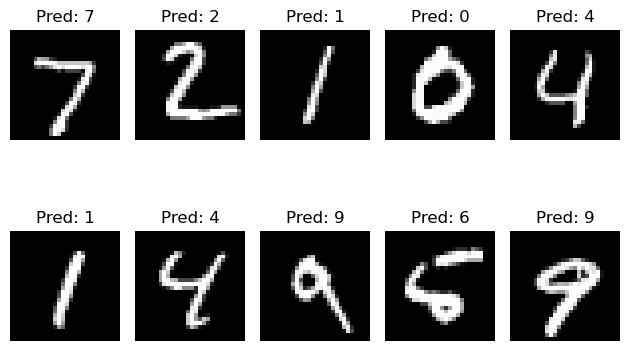

In [6]:
import matplotlib.pyplot as plt

# 10개 테스트 데이터에 대해 예측
for i in range(10):
    output = forward(X_test[i], weights)
    pred_label = np.argmax(output)

    # 이미지 출력
    plt.subplot(2, 5, i+1)
    plt.imshow(X_test[i].reshape(28, 28), cmap='gray')
    plt.title(f"Pred: {pred_label}")
    plt.axis('off')

plt.tight_layout()
plt.show()


In [7]:
# 100개 테스트 데이터 샘플 선택
X_sample = X_test[:100]
y_sample = y_test[:100]

predictions = []

# 예측 및 정확도 계산
correct = 0
for i in range(100):
    output = forward(X_sample[i], weights)
    pred_label = np.argmax(output)

    predictions.append(pred_label)
    
    if pred_label == y_sample[i]:
        correct += 1

accuracy = correct / 100
print(f"Accuracy: {accuracy * 100:.2f}%")




Accuracy: 98.00%


❌ 8번째 샘플 - 실제: 5, 예측: 6


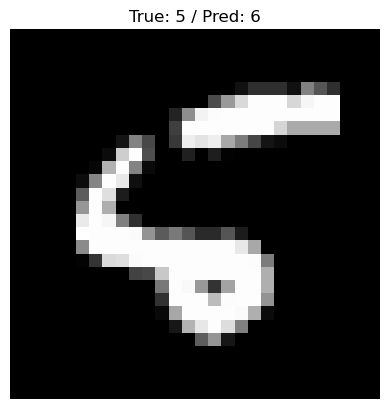

❌ 33번째 샘플 - 실제: 4, 예측: 6


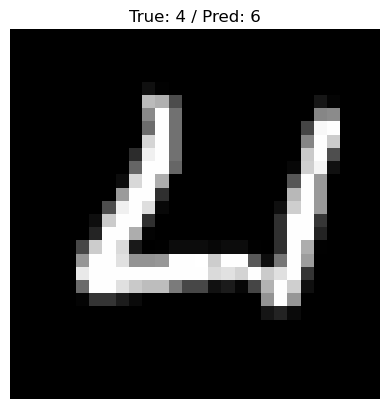

In [8]:
for idx, (true, pred) in enumerate(zip(y_sample, predictions)):
    if true != pred:
        print(f"❌ {idx}번째 샘플 - 실제: {true}, 예측: {pred}")

        # 이미지 출력
        plt.imshow(X_sample[idx].reshape(28, 28), cmap='gray')
        plt.title(f"True: {true} / Pred: {pred}")
        plt.axis('off')
        plt.show()

In [9]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def forward_sigmoid(x, weights):
    W1, b1 = weights['W1'], weights['b1']
    W2, b2 = weights['W2'], weights['b2']
    W3, b3 = weights['W3'], weights['b3']

    z1 = np.dot(x, W1) + b1
    a1 = sigmoid(z1)  # 여기만 relu → sigmoid

    z2 = np.dot(a1, W2) + b2
    a2 = sigmoid(z2)  # 여기도 relu → sigmoid

    z3 = np.dot(a2, W3) + b3
    a3 = softmax(z3)

    return a3


In [10]:
# ReLU 버전
correct_relu = 0
for i in range(100):
    output = forward(X_sample[i], weights)
    pred = np.argmax(output)
    if pred == y_sample[i]:
        correct_relu += 1
accuracy_relu = correct_relu / 100
print(f"ReLU 정확도: {accuracy_relu * 100:.2f}%")

# Sigmoid 버전
correct_sigmoid = 0
for i in range(100):
    output = forward_sigmoid(X_sample[i], weights)
    pred = np.argmax(output)
    if pred == y_sample[i]:
        correct_sigmoid += 1
accuracy_sigmoid = correct_sigmoid / 100
print(f"Sigmoid 정확도: {accuracy_sigmoid * 100:.2f}%")


ReLU 정확도: 98.00%
Sigmoid 정확도: 17.00%


### 결과 비교
- ReLU 정확도: 98.00%
- Sigmoid 정확도: 17.00%

### 분석
- Sigmoid는 깊은 네트워크에서 gradient vanishing 문제가 발생하여 학습이 어렵다.
- ReLU는 기울기 소멸 문제가 적고, 큰 입력에 대해서도 선형적으로 신호를 전달할 수 있다.
- 또한 본 실험에서 사용한 가중치는 ReLU 기반으로 학습된 것이기 때문에, Sigmoid로 교체하면 가중치와 활성화 함수의 mismatch로 인해 성능이 크게 저하되었다.

### 결론
- MNIST 손글씨 분류 문제에서는 ReLU가 Sigmoid에 비해 훨씬 우수한 성능을 보였다.
